# Assignment A1b - Functions and Computation
---
### Ryan Lin


In [1]:
from A1b_rhl72 import *
import matplotlib.pyplot as plt

In [2]:
sinewave(0.0, f=5, d=0.05)

np.float64(-1.0)

In [3]:
gabore(0.0, f=100, sigma=0.01)

np.float64(1.0)

In [4]:
gaboro(-3, f=0.0625, sigma=8)

np.float64(0.8611504148937256)

In [5]:
gabore_norm(f=100, sigma=0.01, fs=10000)

np.float64(9.413727285759265)

In [6]:
normalizer = gabore_norm(f=100, sigma=0.01, fs=10000)
normalizing_constant = 1/normalizer

gaboro(0.003, f=100, sigma=0.01, a=normalizing_constant)

np.float64(-0.09658317126251817)

In [7]:
gamma_normalizer = gammatone_norm(f=100, fs=10000)
gamma_normalizing_constant = 1/gamma_normalizer
gammatone(0.01, f=100, a = gamma_normalizing_constant)

np.float64(0.10873875710573636)

In [8]:
localmaxima([1, 3, 2, -2 ,2, 4 ,8, 6])


[1, 6]

In [9]:
crossings([-1, 0, 1, 2 ,0 ,-2], threshold=1, dir='both')

array([2, 4])

In [10]:
y = np.array([5, 5, 2, 3, 4, 3, -6, -9, 0, -3, 9, -7])
ylower, yupper, blockindices = envelope(y, nblocks=3)
print(blockindices)

[0 4 8]


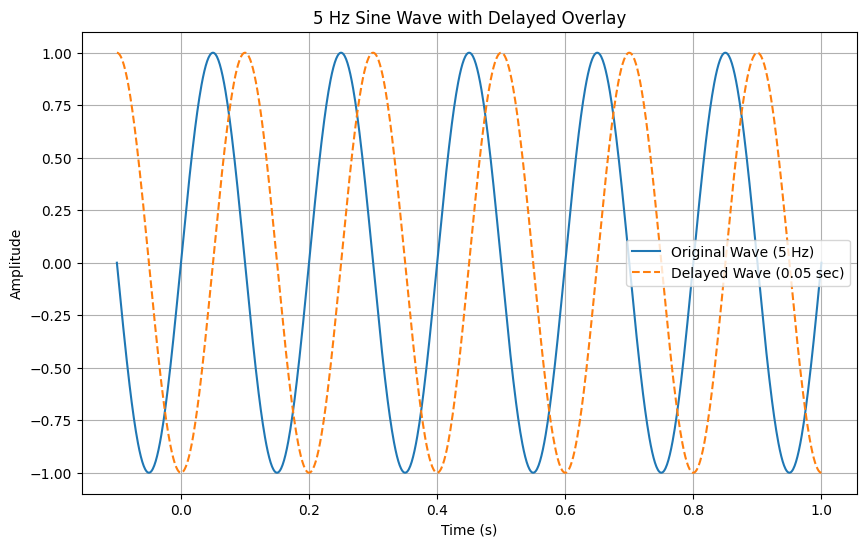

In [11]:
t = np.linspace(-0.1, 1.0, 1000)  
f = 5  
delay = 0.05  

original_wave = sinewave(t, f)
delayed_wave = sinewave(t, f, delay)

plt.figure(figsize=(10, 6))
plt.plot(t, original_wave, label='Original Wave (5 Hz)', linestyle='-')
plt.plot(t, delayed_wave, label='Delayed Wave (0.05 sec)', linestyle='--')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.title('5 Hz Sine Wave with Delayed Overlay')
plt.legend()
plt.grid(True)
plt.show()


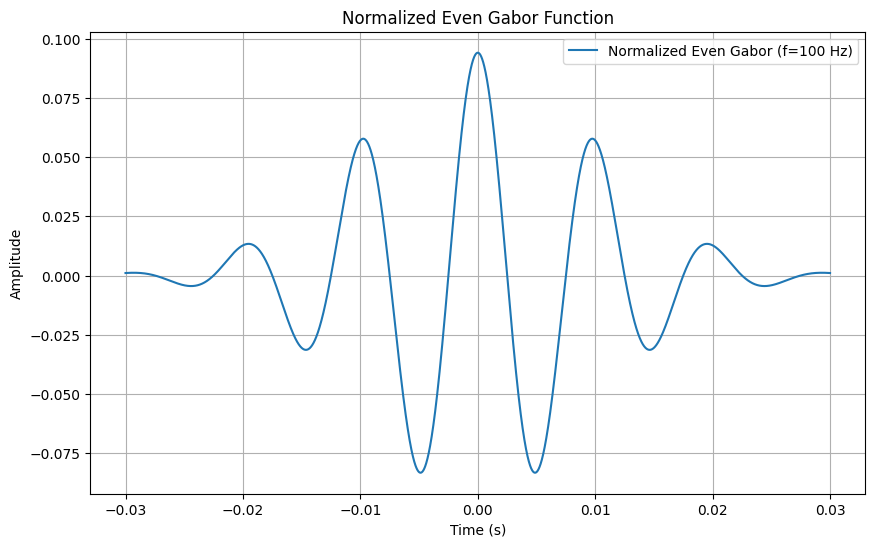

In [16]:
f = 100  
sigma = 1 / f 
fs = 10000  
t = np.linspace(-3 * sigma, 3 * sigma, fs)  

norm_factor = gabor_norm(f, sigma, fs)
gabor_normalizing_constant = 1/norm_factor

gabor_function = gabor(t, sigma, f, a = gabor_normalizing_constant)

# Plot
plt.figure(figsize=(10, 6))
plt.plot(t, gabor_function, label='Normalized Even Gabor (f=100 Hz)', linestyle='-')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.title('Normalized Even Gabor Function')
plt.legend()
plt.grid(True)
plt.show()


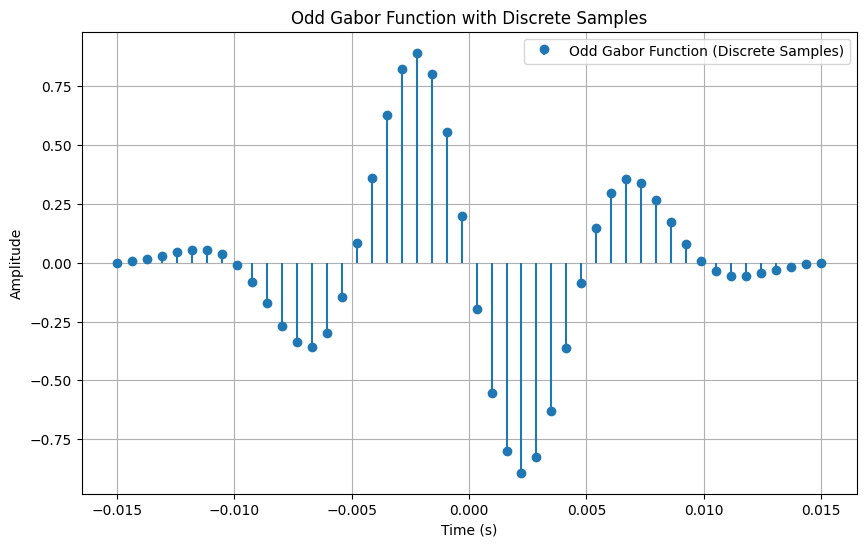

In [19]:
samples_per_period = 16  
sigma_samples = 8  
fs = f * samples_per_period  
t = np.linspace(-3 * sigma_samples / fs, 3 * sigma_samples / fs, 6 * sigma_samples)  

# Generate odd Gabor function
gabor_odd = gaboro(t, sigma_samples / fs, f)

# Stem plot
plt.figure(figsize=(10, 6))
plt.stem(t, gabor_odd, basefmt=" ", label='Odd Gabor Function (Discrete Samples)')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.title('Odd Gabor Function with Discrete Samples')
plt.legend()
plt.grid(True)
plt.show()



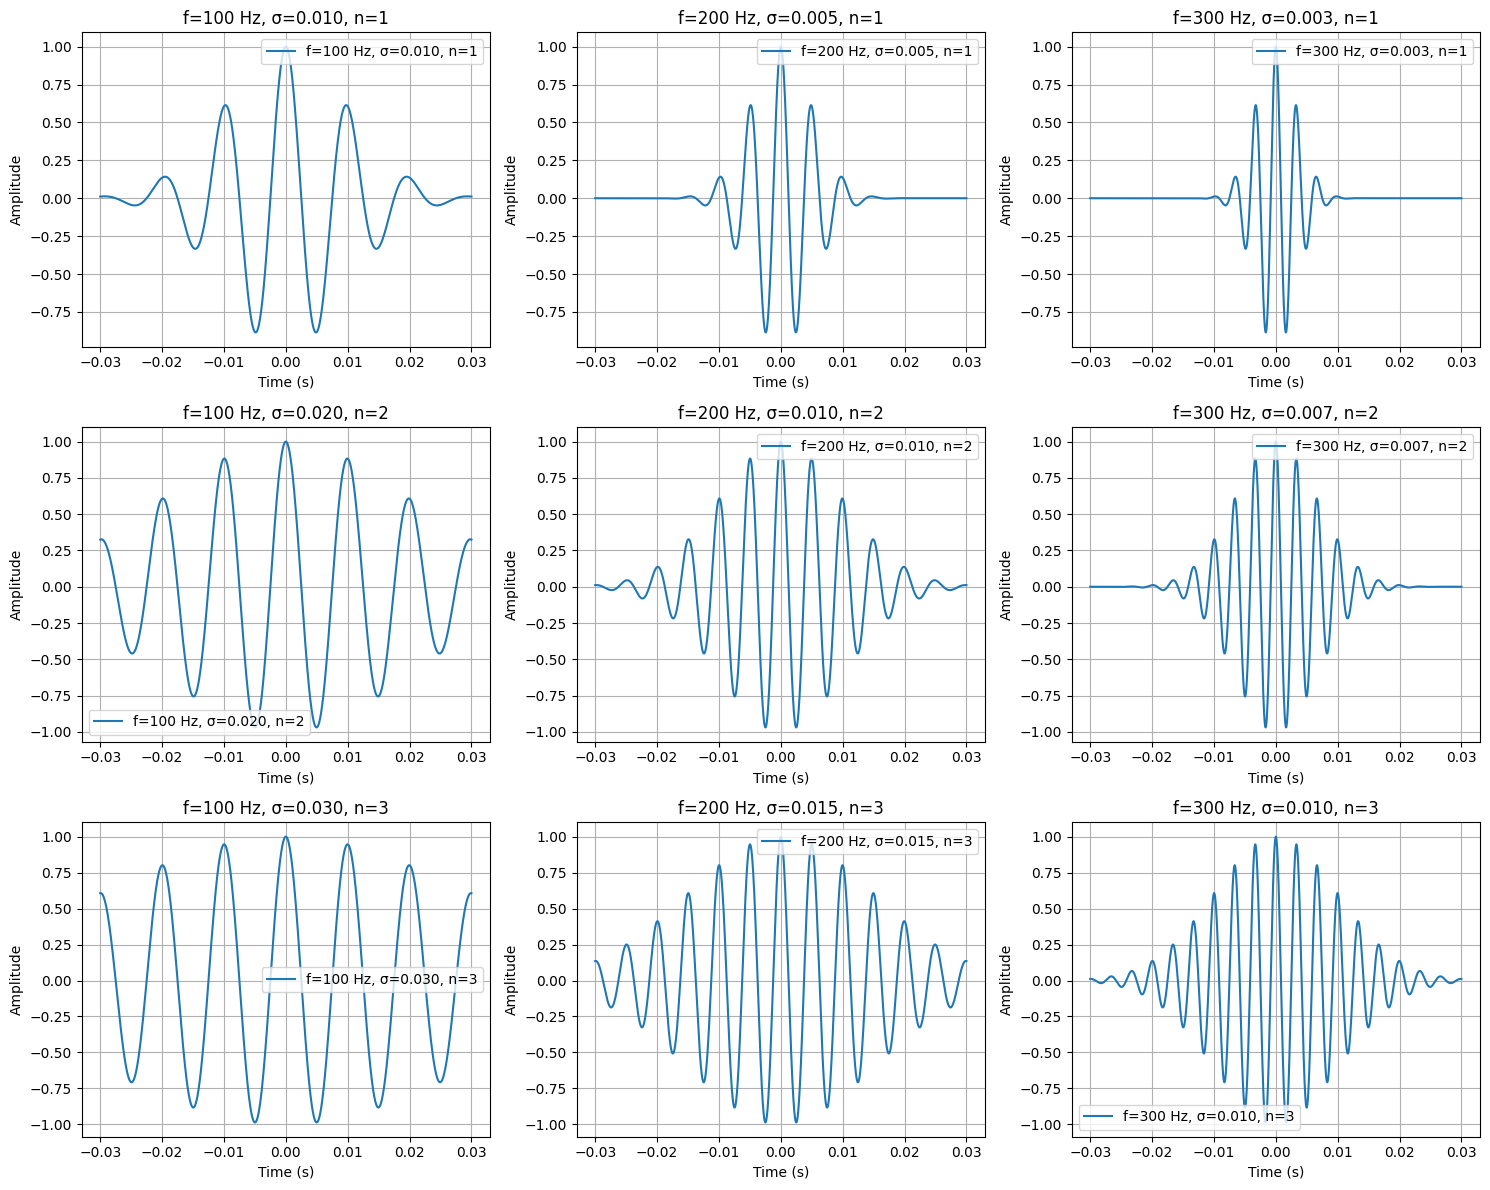

In [ ]:
def create_gabor_grid(frequencies, widths, samples_per_period):
    fig, axes = plt.subplots(len(widths), len(frequencies), figsize=(15, 12))

    fixed_t_range = np.linspace(-3 * (1 / frequencies[0]), 3 * (1 / frequencies[0]), 10000)

    for i, n in enumerate(widths):
        for j, f in enumerate(frequencies):
            sigma = n / f
            fs = f * samples_per_period
            t = fixed_t_range  

            gabor_function = gabor(t, sigma, f)

            ax = axes[i, j]
            ax.plot(t, gabor_function, label=f"f={f} Hz, σ={sigma:.3f}, n={n}")
            ax.set_title(f"f={f} Hz, σ={sigma:.3f}, n={n}")
            ax.set_xlabel("Time (s)")
            ax.set_ylabel("Amplitude")
            ax.legend()
            ax.grid(True)

    plt.tight_layout()
    plt.show()


frequencies = [100, 200, 300] 
width_factors = [1, 2, 3]  
samples_per_period = 16  

create_gabor_grid(frequencies, width_factors, samples_per_period)


In [ ]:
import numpy as np
from trig import *
import matplotlib.pyplot as plt

def erb(f):
    return 24.7*((4.37 * f)/1001)

def bandwidth(f):
    return 1.019 * erb(f)

def gammatone(t, f=1.0, n=4, d=0.0, a=1.0):
    t = np.maximum(t, 0) # t >= 0
    b = bandwidth(f)
    return a * (t**(n-1)) * np.exp(-2 * np.pi * b * t) * coswave(t, f, d)

def gammatone_norm(f=1.0, n=4, fs=1000):
    t = np.linspace(0, 0.1, int(0.1 * fs))  # 0 to 0.1 seconds
    g = gammatone(t, f, n, 0.0, 1.0)
    return 1 / np.sqrt(np.sum(g**2))

# Plot normalized gammatone function
f = 200  # Frequency in Hz
n = 4  # Shape parameter
fs = 1000  # Sampling frequency
t = np.linspace(0, 0.1, 10000)  # Time vector

# Normalizing constant
norm_factor = gammatone_norm(f, n, fs)

# Normalized gammatone function
gammatone_function = norm_factor * gammatone(t, f, n, 0.0)

# Plot
plt.figure(figsize=(10, 6))
plt.plot(t, gammatone_function, label=f"Normalized Gammatone (f={f} Hz, n={n})")
plt.xlabel("Time (s)")
plt.ylabel("Amplitude")
plt.title("Normalized Gammatone Function")
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
# Plot gammatone function with markers at sine wave peaks
f = 200  # Frequency in Hz
n = 4  # Shape parameter
fs = 10000  # Sampling frequency
t = np.linspace(0, 0.05, int(0.05 * fs))  # Time vector (0 to 0.05 seconds)

# Generate gammatone function
norm_factor = gammatone_norm(f, n, fs)
gammatone_function = norm_factor * gammatone(t, f, n, 0.0)

# Find local maxima
maxima_indices = localmaxima(gammatone_function)
maxima_times = t[maxima_indices]
maxima_values = gammatone_function[maxima_indices]

# Plot
plt.figure(figsize=(10, 6))
plt.plot(t, gammatone_function, label=f"Normalized Gammatone (f={f} Hz, n={n})")
plt.scatter(maxima_times, maxima_values, color='red', label='Sine Wave Peaks')
plt.xlabel("Time (s)")
plt.ylabel("Amplitude")
plt.title("Gammatone Function with Peaks Marked")
plt.legend()
plt.grid(True)
plt.show()